In [231]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import statsmodels.api as sm
import warnings
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error


In [232]:
# Reading the data file
df=pd.read_csv(r"D:\analytics files\hr.csv")           

In [233]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [234]:
# Creating data frame of only age and Distance from Home
age_distancefromhome = df[["Age", "DistanceFromHome"]]           

In [235]:
age_distancefromhome

,Age,DistanceFromHome
0,41,1
1,49,8
2,37,2
3,33,3
4,27,2
...,...,...
1465,36,23
1466,39,6
1467,27,4
1468,49,2


In [236]:
# Creating a scatter plot of age and distance from home

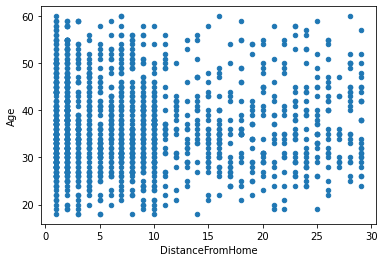

In [237]:
age_distancefromhome.plot(kind='scatter', x = 'DistanceFromHome', y = 'Age')
plt.show()

In [238]:
# Finding all unique values of each column
for column in df.columns:
    print( "{}:{}".format(column,df[column].unique()))

Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [239]:
# Finding the no. of Yes and No in Attrition
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

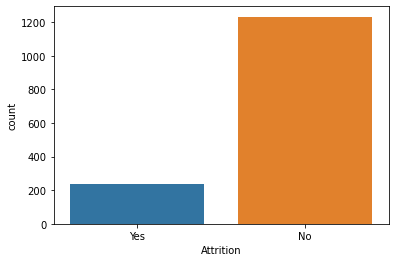

In [240]:
# Plotting the value counts
sns.countplot(x=df['Attrition'])

In [241]:
#Finding the numeric and categorical variables

numeric_col=list(df.select_dtypes(include=np.number).columns)
categorical_col=list(df.select_dtypes(include=object).columns)

In [242]:
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

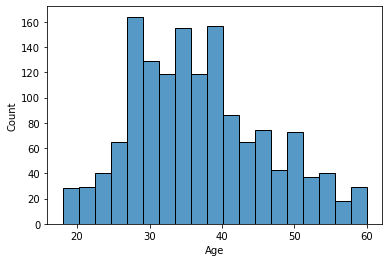

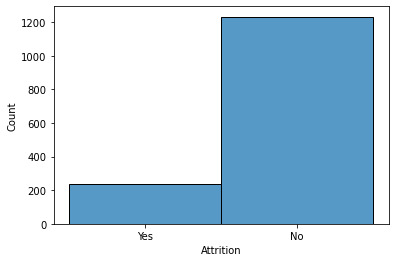

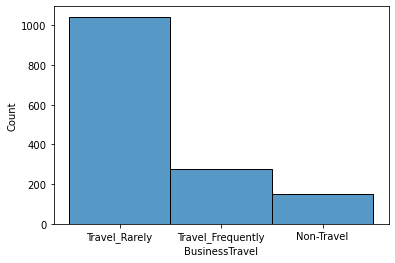

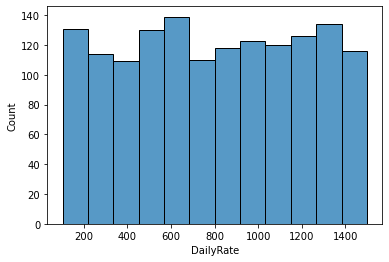

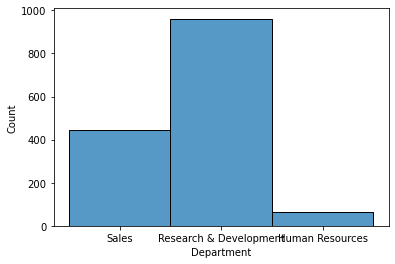

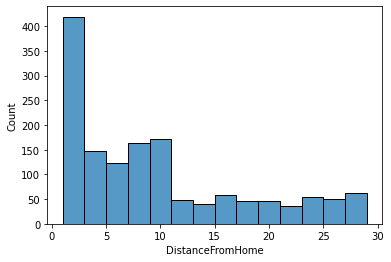

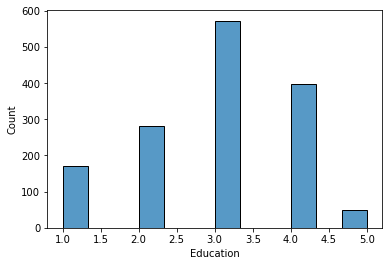

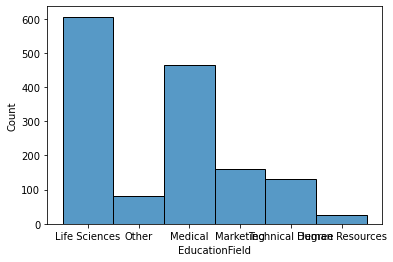

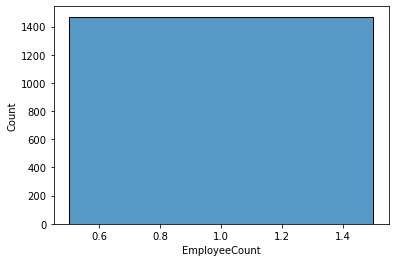

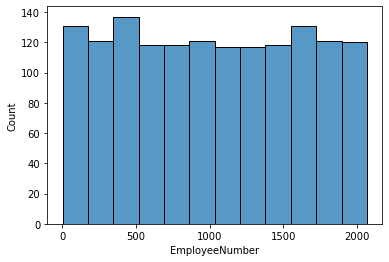

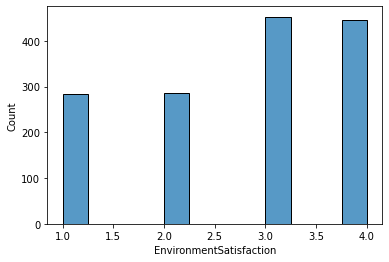

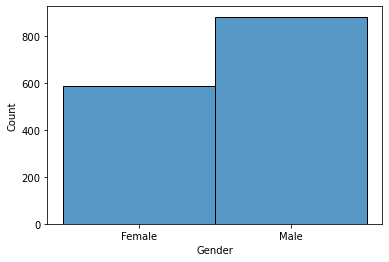

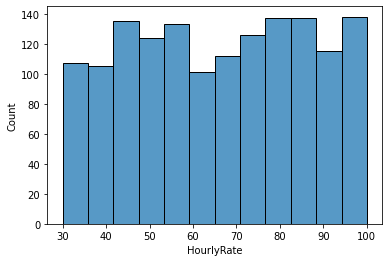

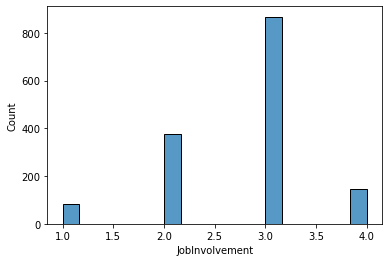

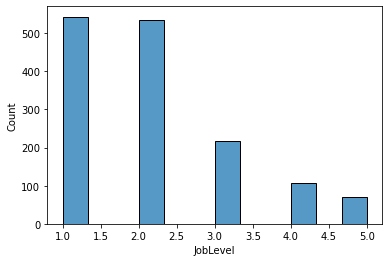

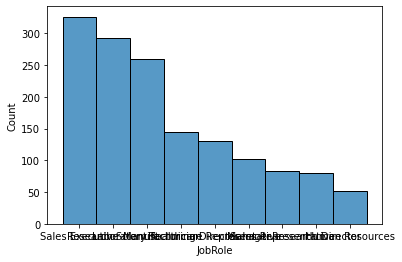

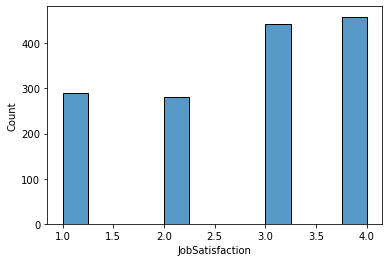

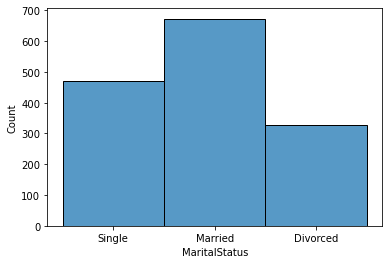

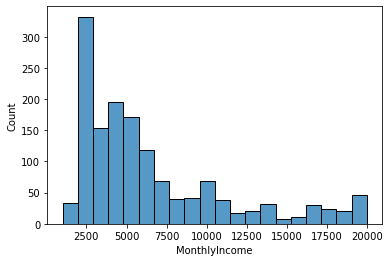

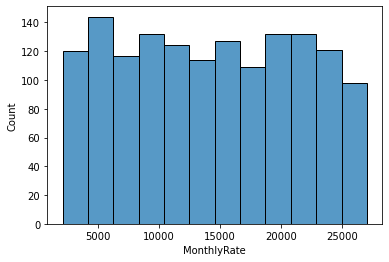

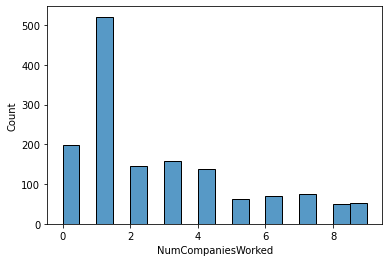

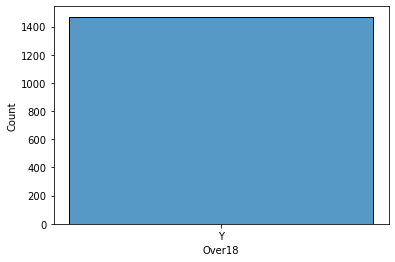

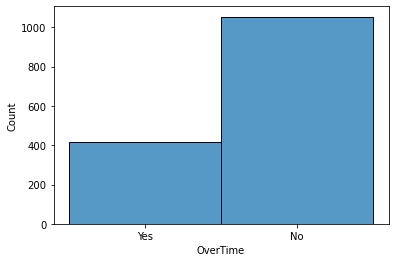

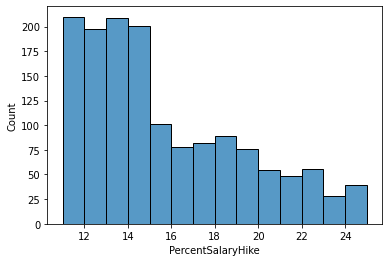

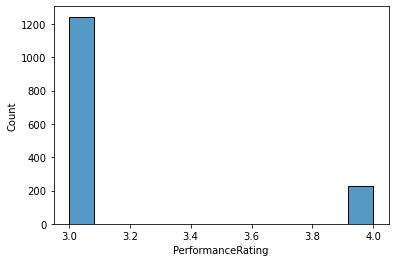

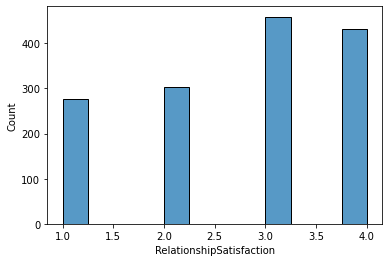

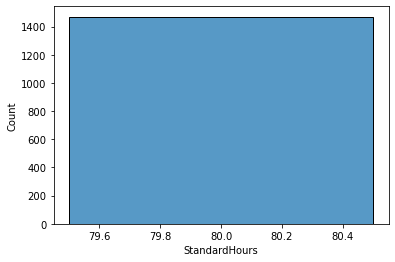

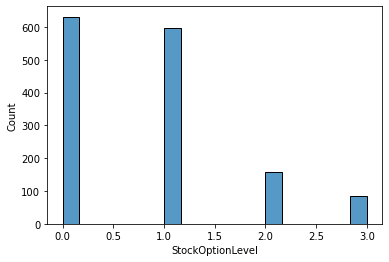

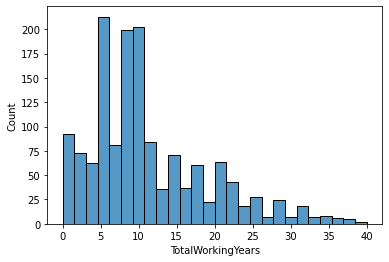

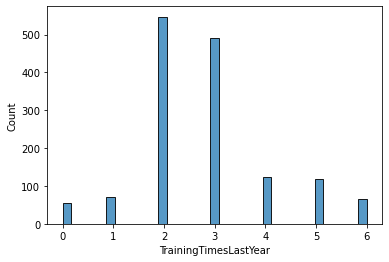

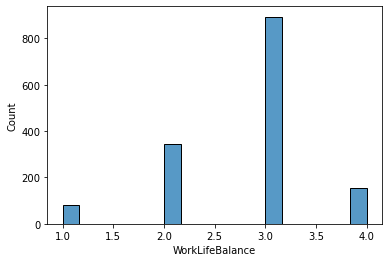

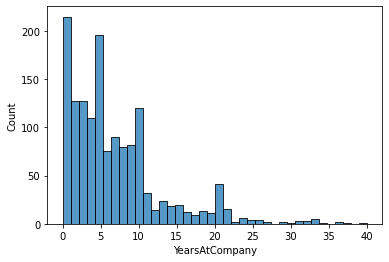

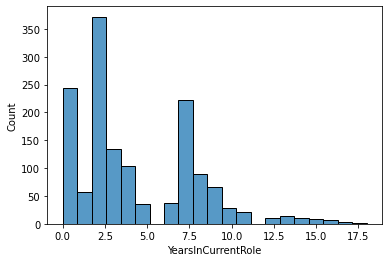

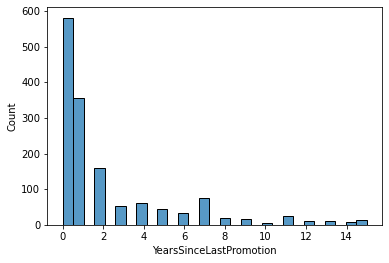

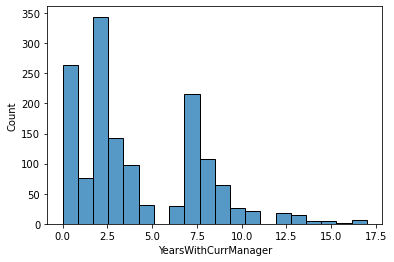

In [243]:
# Plotting the histograms
for col in df:
    sns.histplot(x=df[col])
    plt.show()

In [244]:
# Using groupby to find attrition based on gender
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

In [245]:
# Attrition based on gender as a percentage
df.groupby('Gender')['Attrition'].value_counts(normalize=True)

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

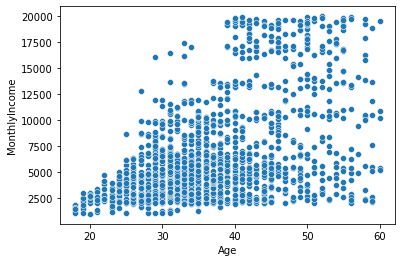

In [246]:
#Using seaborn scatterplot to find relationship between age and income 
sns.scatterplot(x='Age',y='MonthlyIncome',data=df)

In [247]:
# Finding median monthly income based on job role
df.groupby('JobRole')['MonthlyIncome'].median()

JobRole
Healthcare Representative     6811.0
Human Resources               3093.0
Laboratory Technician         2886.0
Manager                      17454.5
Manufacturing Director        6447.0
Research Director            16510.0
Research Scientist            2887.5
Sales Executive               6231.0
Sales Representative          2579.0
Name: MonthlyIncome, dtype: float64

In [248]:
# Removing Attrition from the data frame

X = df.loc[:,df.columns!='Attrition']
y=df['Attrition']

In [249]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [250]:
#Using groupby to find attrition based on gender and department
df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)    

Gender  Department              Attrition
Female  Human Resources         No           0.700000
                                Yes          0.300000
        Research & Development  No           0.886544
                                Yes          0.113456
        Sales                   No           0.798942
                                Yes          0.201058
Male    Human Resources         No           0.860465
                                Yes          0.139535
        Research & Development  No           0.845361
                                Yes          0.154639
        Sales                   No           0.789883
                                Yes          0.210117
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Gender,EducationField,Attrition'>

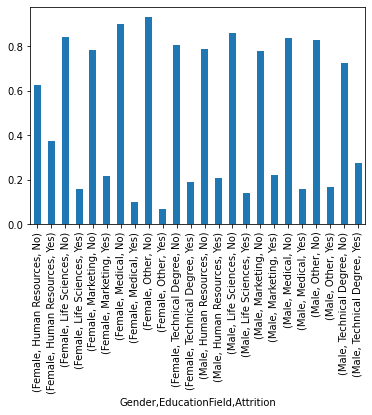

In [251]:
# Creating bar plot of groupby of attrition based on gender and education field

bar_plot=df.groupby(['Gender','EducationField'])['Attrition'].value_counts(normalize=True)
bar_plot.plot(kind='bar')

In [252]:
# Splitting training and test data
X_train,X_test,y_train,y_test = train_test_split(df.Age,df.MonthlyIncome)

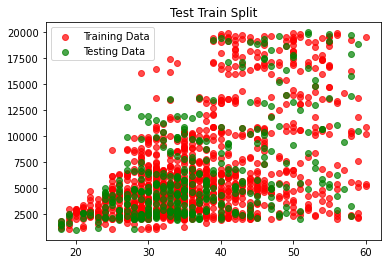

In [253]:
# Creating scatter plot of split and test data
plt.scatter(X_train,y_train,label='Training Data',color = 'r', alpha =.7)
plt.scatter(X_test,y_test,label='Testing Data',color = 'g', alpha =.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [254]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

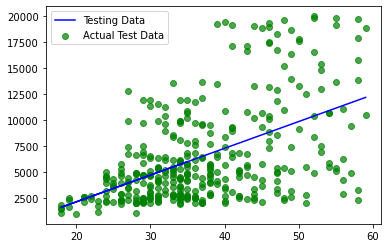

In [255]:
# Linear regression plot
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction,label='Testing Data',color = 'b')
plt.scatter(X_test,y_test,label='Actual Test Data',color = 'g', alpha =.7)
plt.legend()
plt.show()



In [257]:
# Predicting using linear regression
LR.predict(np.array([[50]]))[0]



9888.123734804285

In [258]:
# linear Regression score
LR.score(X_test.values.reshape(-1,1),y_test.values)

0.261707813503507

In [259]:
#random forest
X=df[['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
 'StandardHours','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y=df['JobSatisfaction']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
h=RandomForestRegressor(n_estimators=100,random_state=1)

h.fit(x_train,y_train)
y_pred=h.predict(x_test)
mean_squared_error(y_test,y_pred)



1.3199789115646257

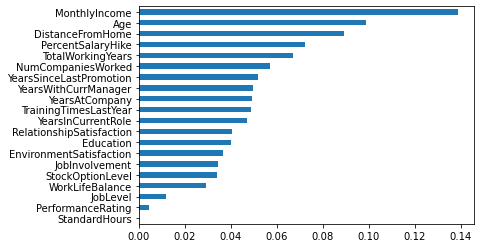

In [260]:
#Random Forest model
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

In [261]:
Barplot_columns=df[['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
 'StandardHours','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

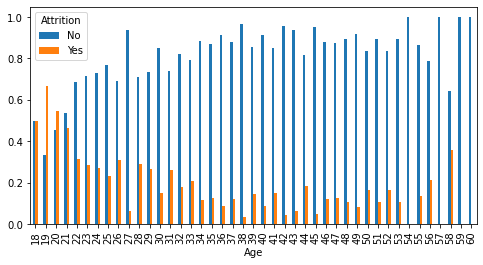

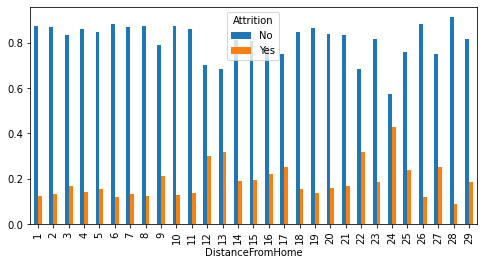

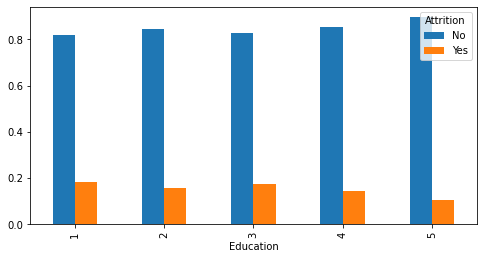

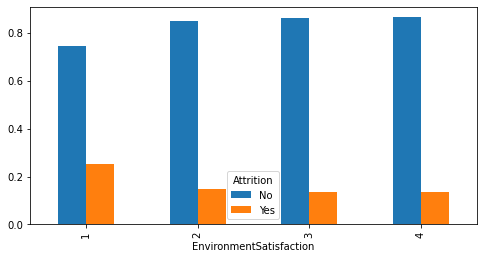

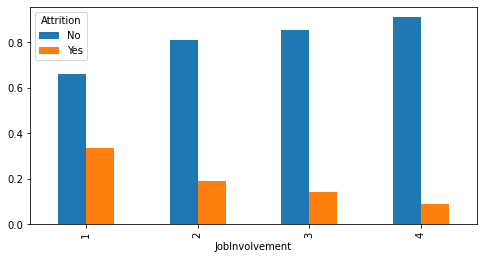

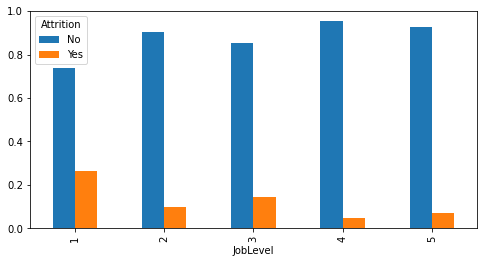

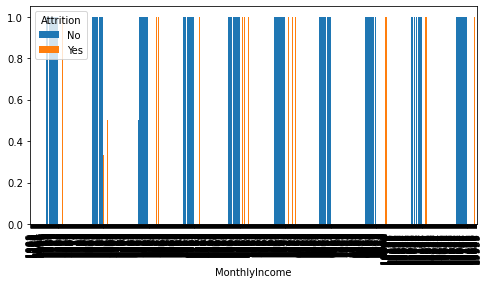

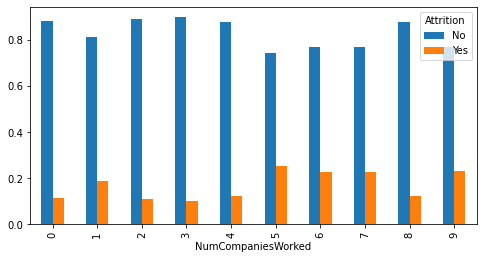

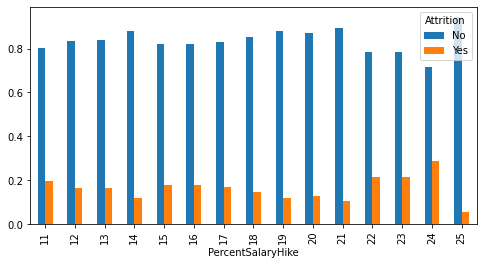

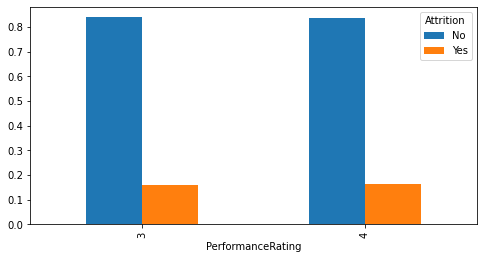

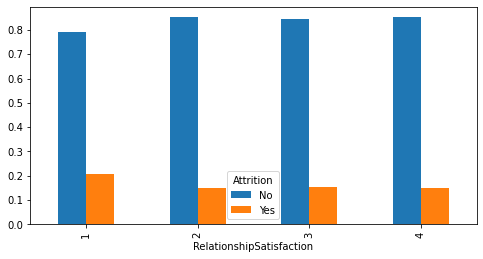

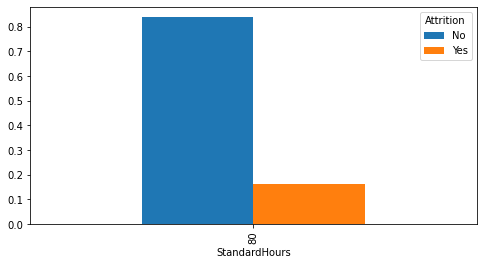

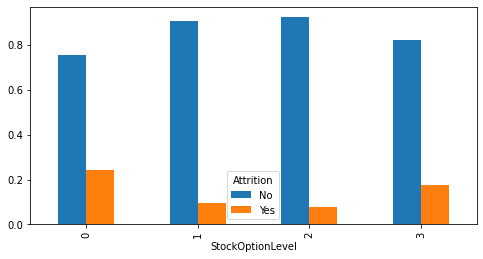

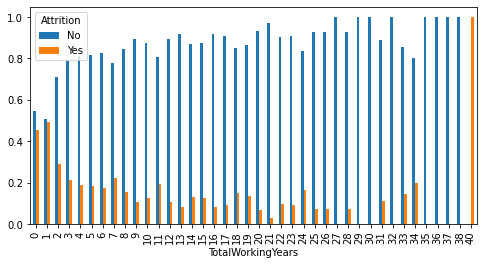

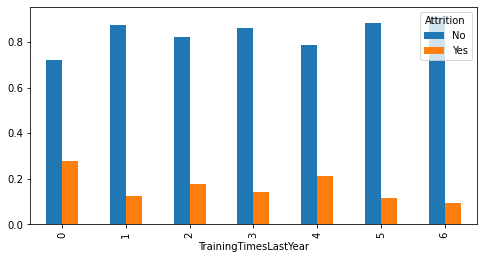

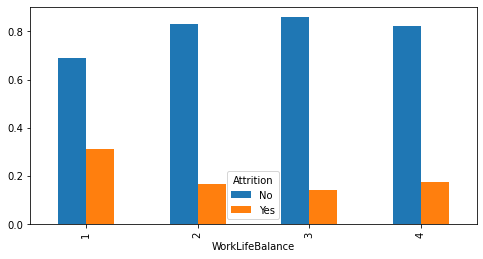

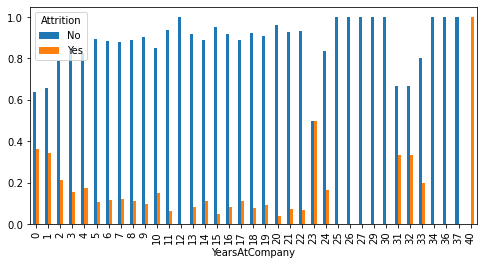

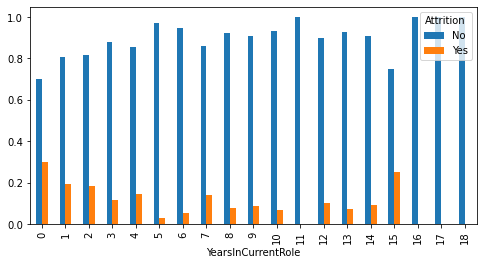

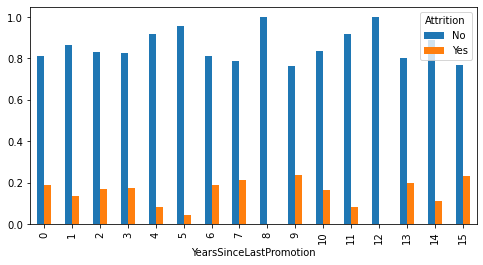

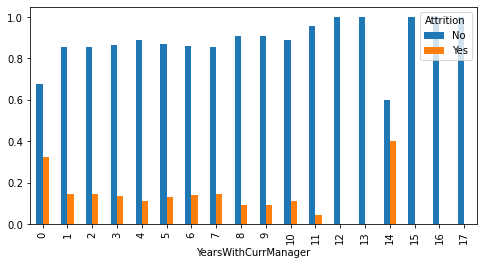

In [262]:
# All possible attrition bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,figsize=(8,4))
    plt.xticks(rotation=90)

for col in Barplot_columns:
    Bar_plots(col)

In [269]:
# Using type
type(df)

pandas.core.frame.DataFrame

In [270]:
type(df.Attrition)

pandas.core.series.Series

In [271]:
# Location of first value
df.Attrition.iloc[1]

'No'

In [272]:
df['Attrition'].value_counts()              

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

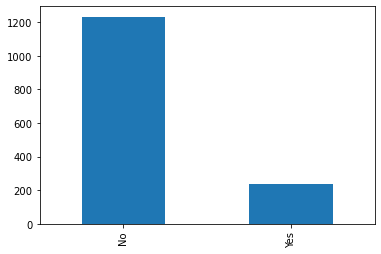

In [273]:
df['Attrition'].value_counts().plot(kind='bar')

In [274]:
# Data frame type of data in each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [275]:
df['Attrition'].nunique()

2

In [276]:
# All unique values in each column
for column in df.columns:
    print( "{}:{}".format(column,df[column].unique()))            


Age:[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate:[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [28]:
# Find minimum and maximum of each column
for column in df.columns:
    if df[column].dtype!=object:
        print( "{}:{}:{}".format(column,df[column].min(),df[column].max()))            


Age:18:60
DailyRate:102:1499
DistanceFromHome:1:29
Education:1:5
EmployeeCount:1:1
EmployeeNumber:1:2068
EnvironmentSatisfaction:1:4
HourlyRate:30:100
JobInvolvement:1:4
JobLevel:1:5
JobSatisfaction:1:4
MonthlyIncome:1009:19999
MonthlyRate:2094:26999
NumCompaniesWorked:0:9
PercentSalaryHike:11:25
PerformanceRating:3:4
RelationshipSatisfaction:1:4
StandardHours:80:80
StockOptionLevel:0:3
TotalWorkingYears:0:40
TrainingTimesLastYear:0:6
WorkLifeBalance:1:4
YearsAtCompany:0:40
YearsInCurrentRole:0:18
YearsSinceLastPromotion:0:15
YearsWithCurrManager:0:17


In [31]:
numeric_col=list(df.select_dtypes(include=np.number).columns)
categorical_col=list(df.select_dtypes(include=object).columns)

In [34]:
#Find numeric columns
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [3]:
# Find categorical and continous variables columns
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)



NameError: name 'df' is not defined

In [38]:
cat_df=df[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']]
con_df=df[['Age','DailyRate','DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]



<AxesSubplot:>

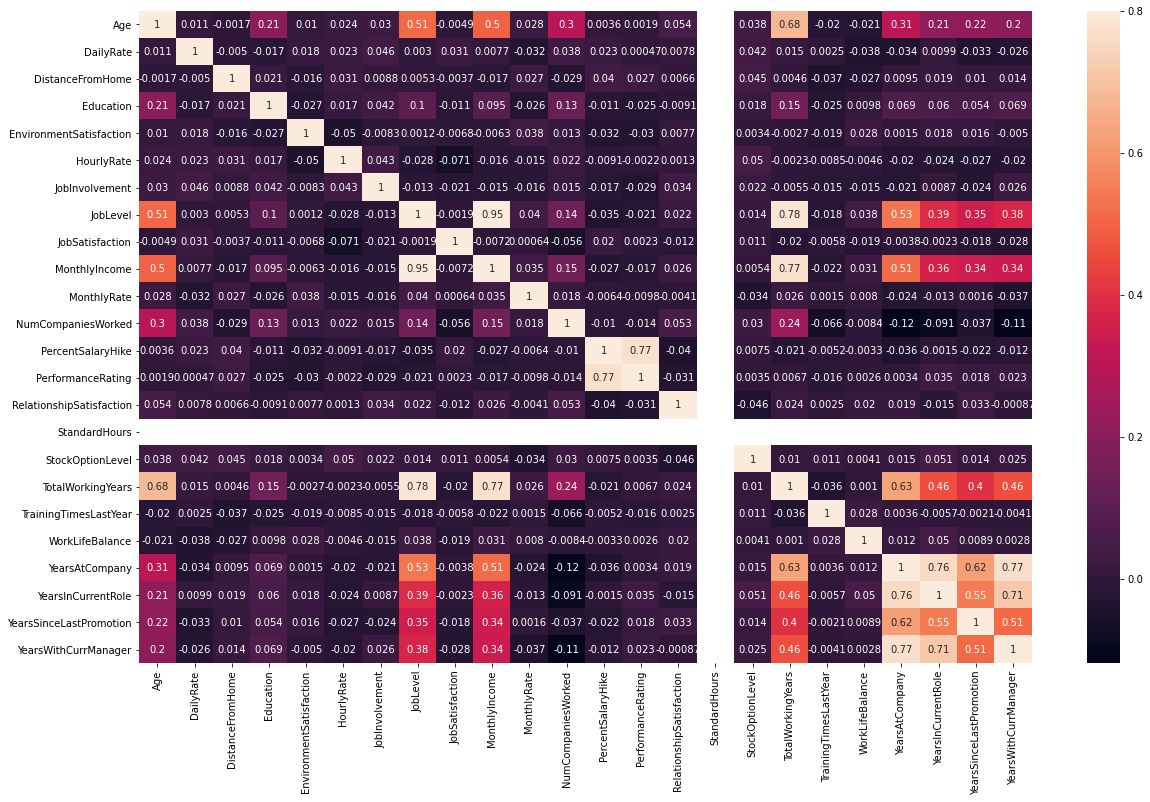

In [40]:
# Correlation map
corr_heatmap = con_df.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_heatmap,vmax=0.8,annot=True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

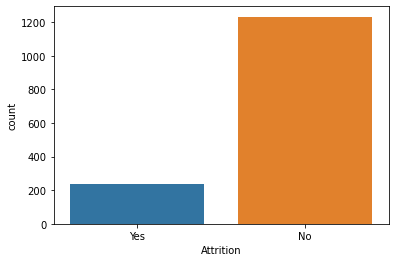

In [41]:
# Finding no. of yes and no in attrition column
sns.countplot(x=df['Attrition'])

In [44]:
# Finding null values
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Length: 1470, dtype: int64

In [52]:
# kde plots
def kdeplot(var):
    fig=plt.figure(figsize=(15,4))
    ax=sns.kdeplot(df.loc[(df['Attrition']=='No'),var],color='b',shade=True, label='no Attrition')
    ax=sns.kdeplot(df.loc[(df['Attrition']=='Yes'),var],color='r',shade=True, label='Attrition')

In [53]:
con_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(con_df.columns)
remove_columns=['Age','DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction',
 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

C:\Users\anit3\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anit3\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


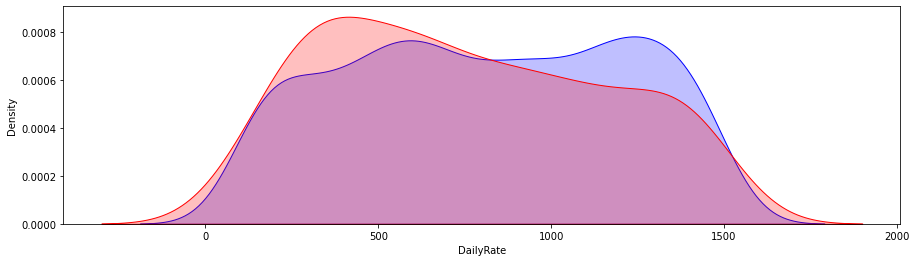

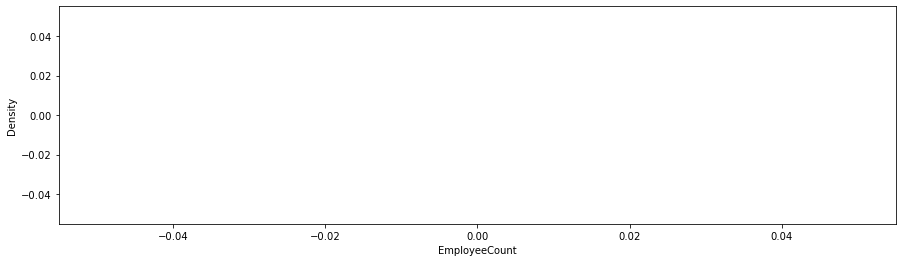

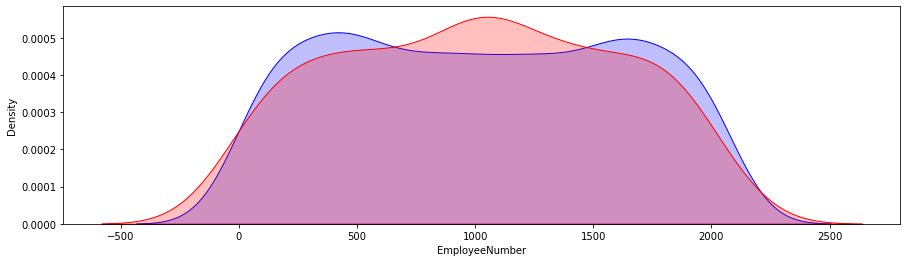

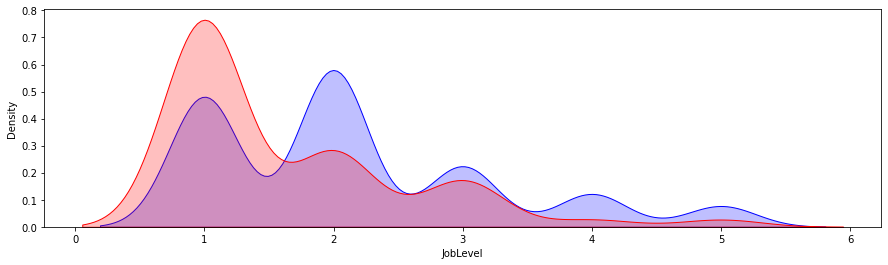

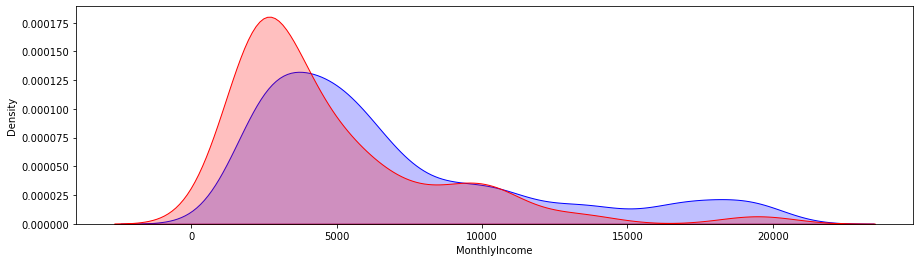

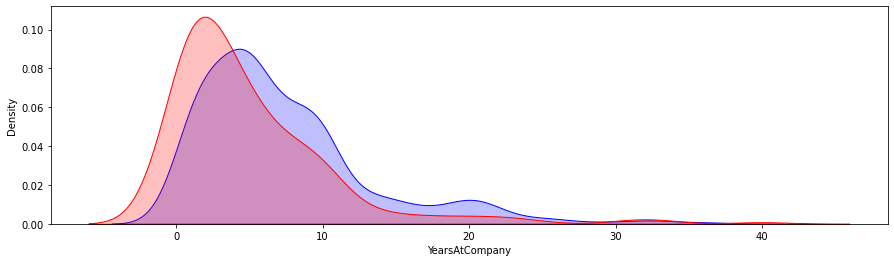

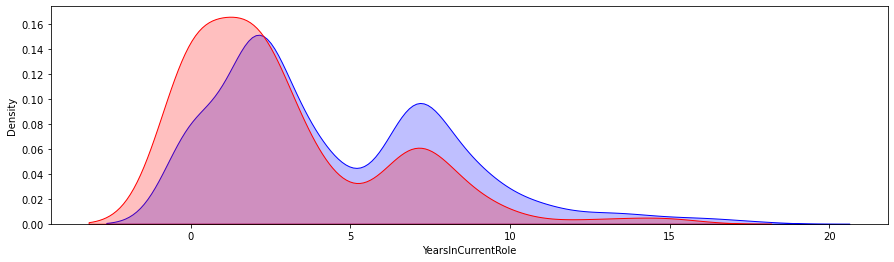

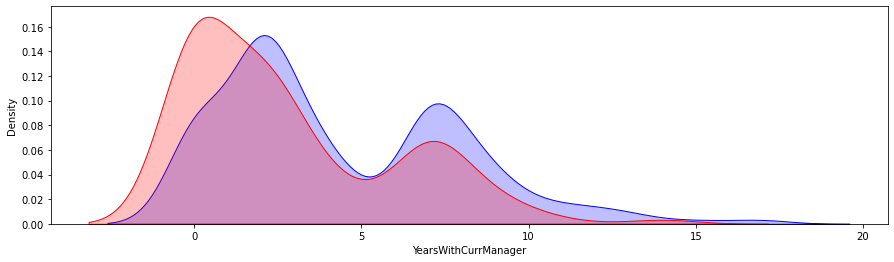

In [54]:
#plotting kde plots
for n in numeric_cols_kdeplot:
    kdeplot(n)

In [56]:
z = np.abs(stats.zscore(df[['Age','DailyRate','DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]))

print(z)

threshold = 3

print(np.where(z > 3))

[[0.4463504  0.74252653 1.01090934 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 1.2977746  0.14714972 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   1.41436324 0.88751511 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 1.60518328 0.64072665 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.54667746 0.88751511 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.43256792 0.14714972 ... 0.33939374 0.36871529 0.59522723]]
(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1

In [278]:
# Dividing into numeric and categorical

numerical_df=df.select_dtypes(include=np.number)
categorical_df=df.select_dtypes(exclude=np.number)
numeric_cols = list(numerical_df.columns)
categorical_cols = list(categorical_df.columns)
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [44]:
# categorical dummies for analysis
categorical_df_dummies=pd.get_dummies(df[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df


,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,...,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,...,3,80,1,17,3,3,5,2,0,3
1466,0,0,1,1,0,0,0,1,0,0,...,1,80,1,9,5,3,7,7,1,7
1467,0,0,1,1,0,1,0,0,0,0,...,2,80,1,6,0,3,6,2,0,3
1468,0,1,0,0,1,0,0,1,0,0,...,4,80,0,17,3,2,9,6,0,8


In [45]:
# Drop columns not useful
final_df.drop(['StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [46]:
final_df.columns

Index(['Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'To

In [47]:
# final dataframe
X=final_df[['BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
Y=final_df[['Attrition_Yes']]

In [55]:
# Random forest classifier
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=30)

rfc =RandomForestClassifier(n_estimators=10,max_depth=4)
model_rfc=rfc.fit(xtrain,ytrain)
pred_rfc=model_rfc.predict(xtest)

print(confusion_matrix(ytest['Attrition_Yes'],pred_rfc))
print(accuracy_score(ytest['Attrition_Yes'],pred_rfc))

[[371   1]
 [ 64   5]]
0.8526077097505669


<ipython-input-55-7f3527d5db74>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc=rfc.fit(xtrain,ytrain)


In [56]:
# random forest model important features
model_rfc.feature_importances_

array([0.        , 0.01497591, 0.01094026, 0.00173292, 0.        ,
       0.00869279, 0.00147927, 0.        , 0.01744667, 0.0061825 ,
       0.02946239, 0.        , 0.        , 0.00352622, 0.        ,
       0.00749969, 0.00448326, 0.00800424, 0.00883407, 0.02997849,
       0.18376561, 0.03667779, 0.0403964 , 0.00282451, 0.00917712,
       0.04403533, 0.00520946, 0.0232919 , 0.02132887, 0.00912563,
       0.09541459, 0.0391654 , 0.02482006, 0.00788856, 0.        ,
       0.00797487, 0.03899379, 0.09245079, 0.01442099, 0.00266826,
       0.05793526, 0.04861525, 0.01097169, 0.02960921])

<BarContainer object of 44 artists>

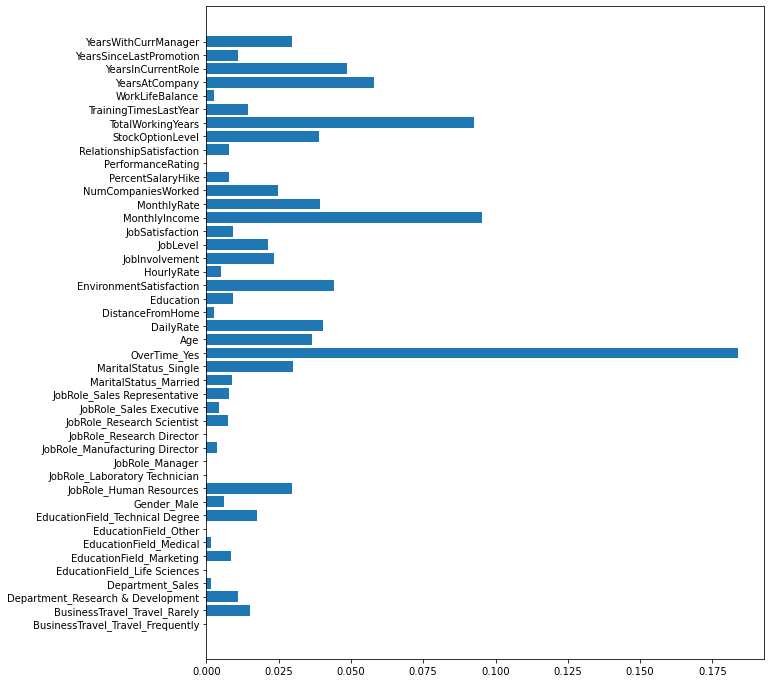

In [57]:
# random forest plot
f,ax =plt.subplots(figsize=(10,12))
plt.barh(X.columns,model_rfc.feature_importances_)

In [62]:
# Decision Tree

X=final_df[['MonthlyIncome','TotalWorkingYears', 'MaritalStatus_Single','JobSatisfaction','EnvironmentSatisfaction','Age','OverTime_Yes','DistanceFromHome']]
       
Y=final_df[['Attrition_Yes']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=30)

dtc=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=4)
model_dtc=dtc.fit(xtrain,ytrain)
pred_dtc=model_dtc.predict(xtest)

print(confusion_matrix(ytest['Attrition_Yes'],pred_dtc))
print(accuracy_score(ytest['Attrition_Yes'],pred_dtc))





[[349  23]
 [ 52  17]]
0.8299319727891157


In [72]:
#Adaboost

X=final_df[['MonthlyIncome','TotalWorkingYears', 'MaritalStatus_Single','JobSatisfaction','EnvironmentSatisfaction','Age','OverTime_Yes','DistanceFromHome']]
       
Y=final_df[['Attrition_Yes']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=30)


abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=10)
model_abc=abc.fit(xtrain,ytrain)
pred_abc=model_abc.predict(xtest)

print(confusion_matrix(ytest['Attrition_Yes'],pred_abc))
print(accuracy_score(ytest['Attrition_Yes'],pred_abc))

[[359  13]
 [ 54  15]]
0.8480725623582767


C:\Users\anit3\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
#logistics regression
X=final_df[['MonthlyIncome','TotalWorkingYears', 'StockOptionLevel','MaritalStatus_Single','JobSatisfaction','EnvironmentSatisfaction','Age','OverTime_Yes','DistanceFromHome']]
       
Y=final_df[['Attrition_Yes']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=30)

lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
pred_lr=model_lr.predict(xtest)

ytest["predicted"]=pred_lr
ytest.head()

C:\Users\anit3\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\anit3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-75-603109da0357>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Attrition_Yes,predicted
461,0,0
640,0,0
509,0,0
788,0,0
950,0,0


In [76]:
xtest.shape

(441, 9)

In [77]:
ytest.shape

(441, 2)

In [85]:
print(confusion_matrix(ytest['Attrition_Yes'],pred_lr))
print(accuracy_score(ytest['Attrition_Yes'],pred_lr))

[[372   0]
 [ 67   2]]
0.8480725623582767


In [1]:
pred_lr1=model_lr1.predict_proba(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(ytest['Attrition_Yes'],pred_lrl[:,1])
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,roc_auc)
plt.show()

NameError: name 'model_lr1' is not defined